# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [24]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [25]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


<font size = "5">

Compute frequencies by status

In [26]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,231
Treatment,167


col_0,Frequency
status,
Control,0.580402
Treatment,0.419598


<font size = "5">

Query with string conditions

In [27]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [28]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,23.639521,5.514970,198.628743,3005.556886,15.629940
std,7.956818,1.703491,104.796791,856.724243,2.659661
min,10.000000,4.000000,71.000000,1755.000000,9.000000
25%,17.500000,4.000000,107.500000,2271.500000,14.000000
50%,23.000000,4.000000,151.000000,2815.000000,15.500000
75%,28.050000,8.000000,302.000000,3727.500000,17.150000
max,46.600000,8.000000,455.000000,5140.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,231.000000,231.000000,231.000000,231.000000,231.000000
mean,23.424242,5.411255,189.666667,2945.025974,15.523377
std,7.728677,1.701573,103.950434,840.573681,2.831326
min,9.000000,3.000000,68.000000,1613.000000,8.000000
25%,17.250000,4.000000,98.000000,2203.500000,13.650000
50%,22.000000,4.000000,141.000000,2800.000000,15.500000
75%,29.650000,7.000000,259.000000,3566.500000,17.150000
max,44.600000,8.000000,455.000000,4997.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [29]:
def function(parameter):
    if parameter >= 60:
        status = "pass"
    else:
        status = "fail"
    return(status)

status1 = function(parameter = 5)
print(status1)
#string means a set of character/alphabets; it's basically words/texts

#data["can_vote"]    = data["age"].apply(fn_iseligible_vote)
#this creates a new column called can_vote that has the function fn_iseligible_vote applied to "age"


fail


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [30]:
#dataset.query("conditions")
#query extracts the part of dataset that met the conditions
#statistics -> variable.mean(), variable.median()
print(carfeatures["mpg"].std())
data_rangeweight    = carfeatures.query("(acceleration >= 10) & (acceleration < 18)")
display(data_rangeweight)

threshold = 25 #this is global variable

data_varthreshold_mpg = carfeatures.query("mpg >= @threshold") 

7.815984312565782


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
390,32.0,4,144,96,2665,13.9,T-1694070,Control
391,36.0,4,135,84,2370,13.0,D-1694081,Control
392,27.0,4,151,90,2950,17.3,C-1694092,Treatment
393,27.0,4,140,86,2790,15.6,F-1694103,Control


<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [33]:
carsorted = carfeatures.sort_values(by = "mpg", ascending = False)
# The following command extracts all columns for row zero
# Remember that numbering starts at zero in Python
# In this case we will show the car with the highest "mpg" value
display(carsorted.iloc[0:6,:])

#sort values by the column variable

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
322,46.6,4,86,65,2110,17.9,M-1693322,Control
329,44.6,4,91,67,1850,13.8,H-1693399,Treatment
325,44.3,4,90,48,2085,21.7,V-1693355,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
326,43.4,4,90,48,2335,23.7,V-1693366,Treatment
244,43.1,4,90,48,1985,21.5,V-1692464,Control


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [32]:
list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [34]:
 def fn_quiz(y,x,b0,b1):
    b0 = y + np.exp(x**2)
    b1 = y +np.sqrt(x)
    return(b0, b1)

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

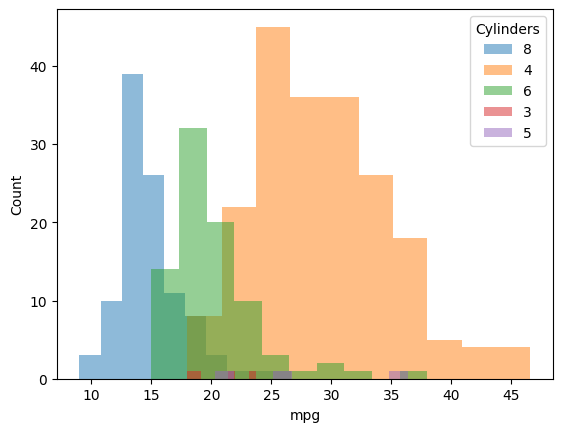

In [38]:
list_unique_cylinders = pd.unique(carfeatures["cylinders"])
for category in list_unique_cylinders:
    df   = carfeatures.query("cylinders == @category")
    plt.hist(x = df["mpg"], alpha = 0.5)
    
# Add labels and a legends    
plt.xlabel("mpg")
plt.ylabel("Count")
plt.legend(labels = list_unique_cylinders,
           title  = "Cylinders")
plt.show()

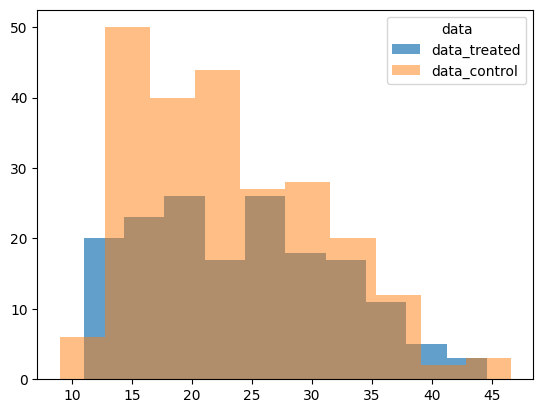

In [46]:
data_treated.describe()
data_control.describe()
plt.hist(x= data_treated["mpg"], alpha=0.7)
plt.hist(x= data_control["mpg"], alpha = 0.5)
x= ["data_treated", "data_control"]
plt.legend(labels = x,
           title = "data")